In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.io import imread, imshow

image = imread('D:\\MULANGA\\myproject\\images2\\phot2.jpeg')



def plot_fourier_transformer(image, filtered_gray_image, filtered_rgb_image):
    
    if len(image.shape) == 2:
        image = np.stack((image, image, image), axis=-1)
gray_image = rgb2gray(image)


f_image = np.fft.fft2(gray_image)
fshift = np.fft.fftshift(f_image)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

image_gray_fft2 = fshift.copy()


image_gray_fft2[:286, fshift.shape[1]//2] = 1
image_gray_fft2[-286:, fshift.shape[1]//2] = 1


inv_fshift = np.fft.ifftshift(image_gray_fft2)
filtered_gray_image = np.fft.ifft2(inv_fshift)
filtered_gray_image = np.abs(filtered_gray_image)


transformed_channels = []
for i in range(3):
    rgb_fft = np.fft.fftshift(np.fft.fft2((image[:, :, i])))
    rgb_fft2 = rgb_fft.copy()

  
    rgb_fft2[:286, rgb_fft.shape[1]//2] = 1
    rgb_fft2[-286:, rgb_fft.shape[1]//2] = 1



    transformed_channels.append(
        abs(np.fft.ifft2(np.fft.ifftshift(rgb_fft2))))

filtered_rgb_image = np.dstack(
    [transformed_channels[0], transformed_channels[1], transformed_channels[2]])
filtered_rgb_image = np.clip(filtered_rgb_image, 0, 255).astype(np.uint8)

plot_fourier_transformer(image, filtered_gray_image, filtered_rgb_image)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.io import imread, imshow

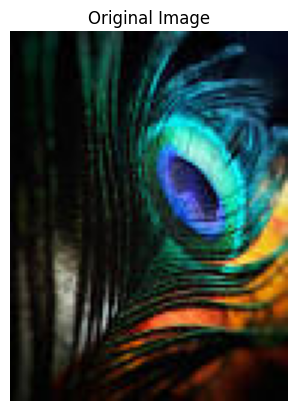

In [6]:
image = imread('D:\\MULANGA\\myproject\\images2\\phot2.jpeg')
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()

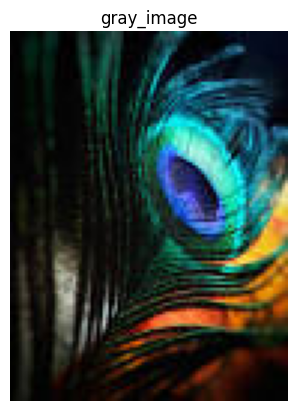

In [8]:
gray_image = rgb2gray(image)
f_image = np.fft.fft2(gray_image)
plt.imshow(image)
plt.title('gray_image')
plt.axis('off')
plt.show()

In [9]:
fshift = np.fft.fftshift(f_image)


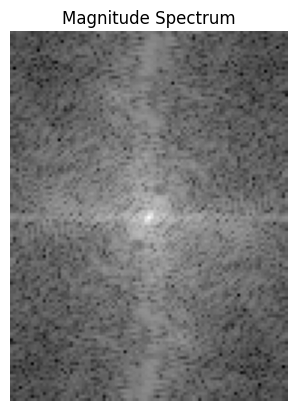

In [10]:
magnitude_spectrum = 20 * np.log(np.abs(fshift))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')
plt.show()

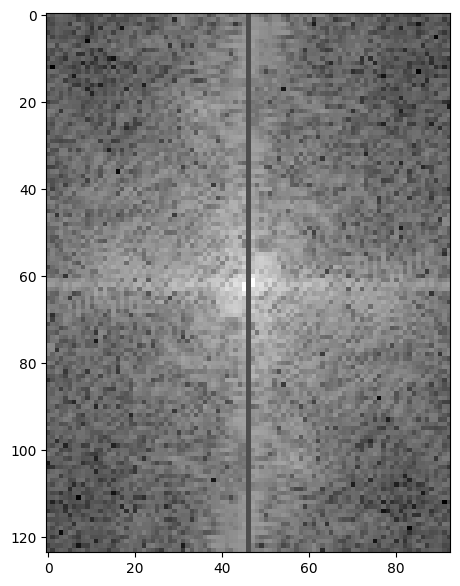

In [11]:
image_gray_fft2 = fshift.copy()
image_gray_fft2[:286, fshift.shape[1]//2] = 1
image_gray_fft2[-286:, fshift.shape[1]//2] = 1

plt.figure(figsize=(7,7))
plt.imshow(np.log(abs(image_gray_fft2)), cmap='gray');

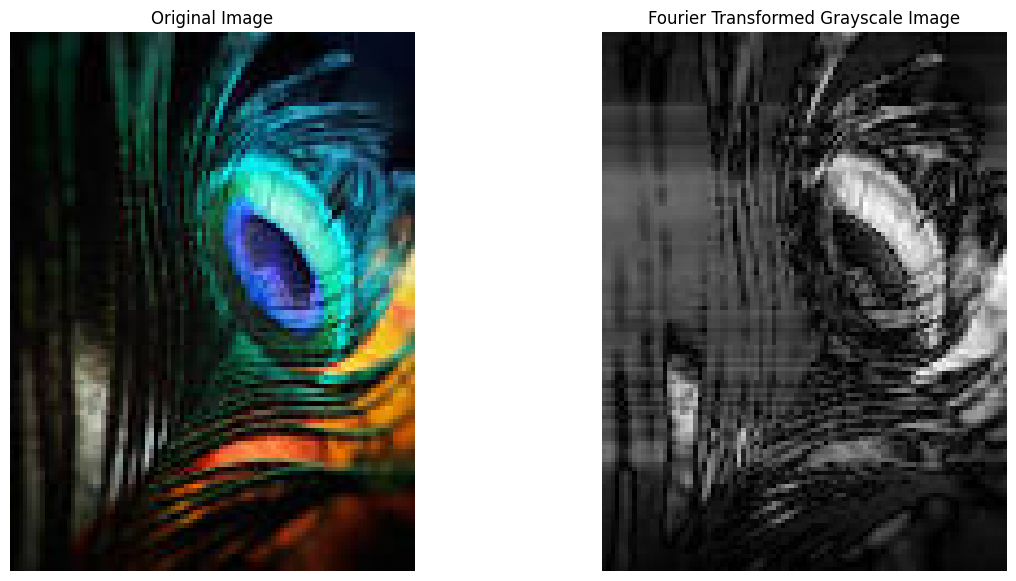

In [12]:
inv_fshift = np.fft.ifftshift(image_gray_fft2)
filtered_gray_image = np.fft.ifft2(inv_fshift)
filtered_gray_image = np.abs(filtered_gray_image)

# Plot the original and fourier-transformed grayscale image
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(filtered_gray_image, cmap='gray')
ax[1].set_title('Fourier Transformed Grayscale Image')
ax[1].axis('off')

plt.show()


In [13]:
transformed_channels = []
for i in range(3):
    rgb_fft = np.fft.fftshift(np.fft.fft2((image[:, :, i])))
    rgb_fft2 = rgb_fft.copy()
    
    # Use the same filters as the grayscale image, just change the variables
    rgb_fft2[:286, rgb_fft.shape[1]//2] = 1
    rgb_fft2[-286:, rgb_fft.shape[1]//2] = 1
    transformed_channels.append(abs(np.fft.ifft2(np.fft.ifftshift(rgb_fft2))))

In [14]:
filtered_rgb_image = np.dstack([transformed_channels[0], transformed_channels[1], transformed_channels[2]])
filtered_rgb_image = np.clip(filtered_rgb_image, 0, 255).astype(np.uint8)

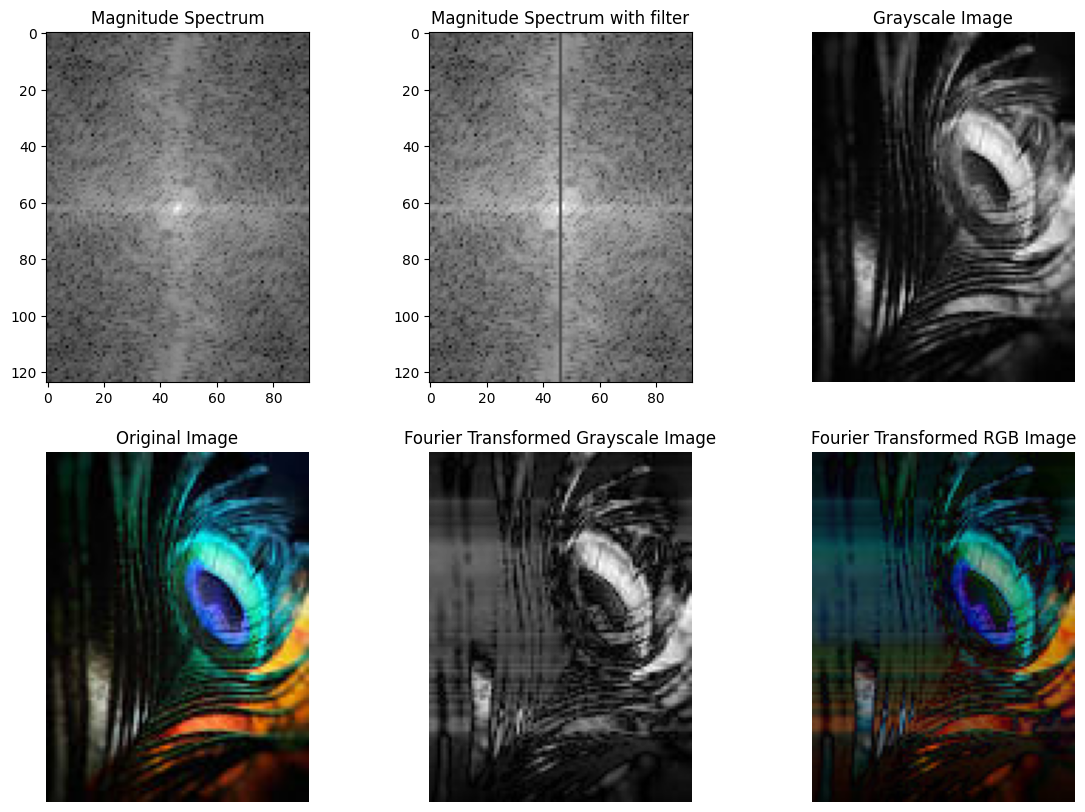

In [15]:
def plot_fourier_transformer(image, filtered_gray_image, filtered_rgb_image):
    
    if len(image.shape) == 2:
        image = np.stack((image, image, image), axis=-1)

    # Convert the image to grayscale
    gray_image = rgb2gray(image[:,:,:3])
    
    # Calculate the 2D Fourier transform and shift the zero-frequency components to the center
    f_image = np.fft.fft2(gray_image)
    fshift = np.fft.fftshift(f_image)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))

    # Plot the images
    fig, ax = plt.subplots(2, 3, figsize=(14, 10))

    ax[0, 0].imshow(magnitude_spectrum, cmap='gray')
    ax[0, 0].set_title('Magnitude Spectrum')

    ax[0, 1].imshow(magnitude_spectrum, cmap='gray')
    ax[0, 1].imshow(np.log(abs(image_gray_fft2)), cmap='gray')
    ax[0, 1].set_title('Magnitude Spectrum with filter')

    ax[0, 2].imshow(gray_image, cmap='gray')
    ax[0, 2].set_title('Grayscale Image')
    ax[0, 2].set_axis_off()

    ax[1, 0].imshow(image)
    ax[1, 0].set_title('Original Image')
    ax[1, 0].set_axis_off()

    ax[1, 1].imshow(filtered_gray_image, cmap='gray')
    ax[1, 1].set_title('Fourier Transformed Grayscale Image')
    ax[1, 1].set_axis_off()

    ax[1, 2].imshow(filtered_rgb_image)
    ax[1, 2].set_title('Fourier Transformed RGB Image')
    ax[1, 2].set_axis_off()

    # Save the Fourier-transformed RGB image
    plt.savefig('filtered_rgb_image.png', dpi=300)
    plt.show()

plot_fourier_transformer(image, filtered_gray_image, filtered_rgb_image)

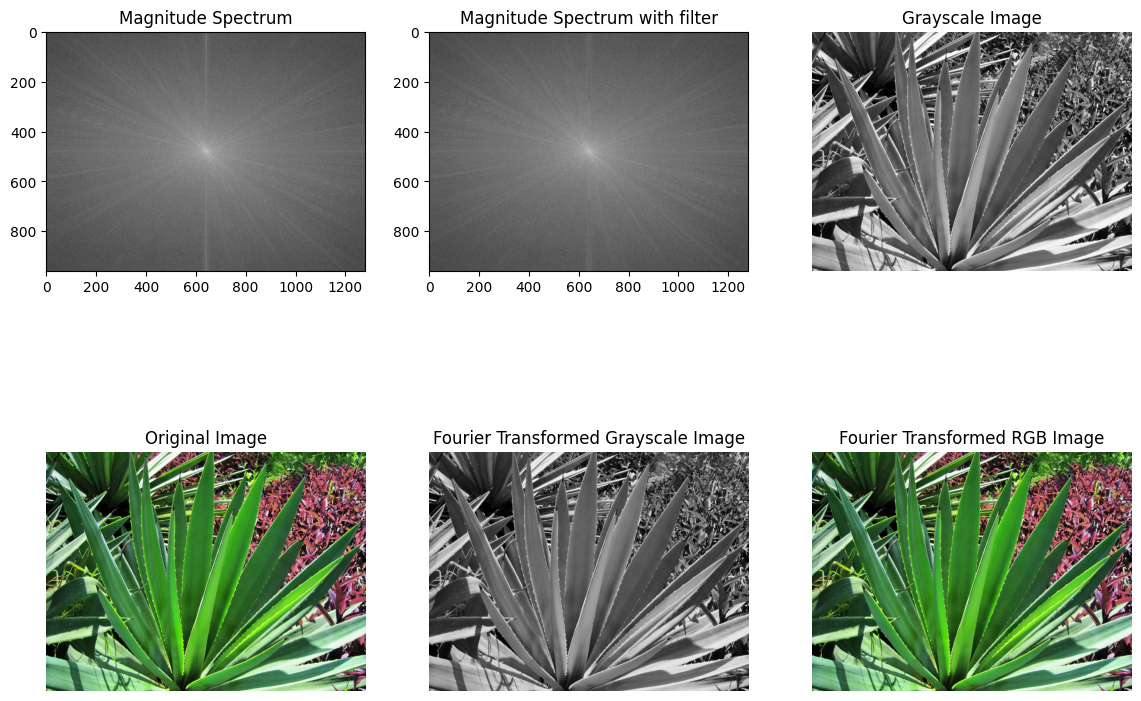

In [19]:

image = imread('D:\\MULANGA\\myproject\\photos\\phot4.jpg')

if len(image.shape) == 2:
    image = np.stack((image, image, image), axis)
gray_image = rgb2gray(image)

f_image = np.fft.fft2(gray_image)
fshift = np.fft.fftshift(f_image)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

image_gray_fft2 = fshift.copy()

image_gray_fft2[:286, fshift.shape[1]//2] = 1
image_gray_fft2[-286:, fshift.shape[1]//2] = 1
inv_fshift = np.fft.ifftshift(image_gray_fft2)
filtered_gray_image = np.fft.ifft2(inv_fshift)
filtered_gray_image = np.abs(filtered_gray_image)
transformed_channels = []
for i in range(3):
    rgb_fft = np.fft.fftshift(np.fft.fft2((image[:, :, i])))
    rgb_fft2 = rgb_fft.copy()
    rgb_fft2[:286, rgb_fft.shape[1]//2] = 1
    rgb_fft2[-286:, rgb_fft.shape[1]//2]

    transformed_channels.append(
        abs(np.fft.ifft2(np.fft.ifftshift(rgb_fft2))))

filtered_rgb_image = np.dstack(
    [transformed_channels[0], transformed_channels[1], transformed_channels[2]])
filtered_rgb_image = np.clip(filtered_rgb_image, 0, 255).astype(np.uint8)

plot_fourier_transformer(image, filtered_gray_image, filtered_rgb_image)